In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR


In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd 
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets, layers, models

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from IPython.display import display
from tqdm import tqdm

In [3]:
os.chdir('../artifacts/06_10_2024_18_47_06/data_ingestion/data')

In [4]:
os.getcwd()

'/Users/kshitijberi/Documents/GitHub/braintumor/artifacts/06_10_2024_18_47_06/data_ingestion/data'

In [5]:
data_path=os.getcwd()

In [6]:
training = os.path.join(data_path, 'train')
testing = os.path.join(data_path, 'test')

In [7]:
def custom_preprocessing(image):
    image = tf.image.central_crop(image, central_fraction=0.875)
    return image


In [32]:
train = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.9, 1.1),
    horizontal_flip=True,
    rotation_range=10,)

test = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.9, 1.1),
    horizontal_flip=True,
    rotation_range=10,
)




In [42]:
x = train.flow_from_directory(
    training,
    target_size=(128, 128),
    batch_size=4,
    class_mode='categorical'
)
x_train = train.flow_from_directory(
    testing,
    target_size=(128, 128),
    batch_size=4,
    class_mode='categorical'
)


Found 5710 images belonging to 4 classes.
Found 1213 images belonging to 4 classes.


In [43]:
y = x.classes

In [44]:
model = tf.keras.models.Sequential()
#
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128,3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
#

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
# 
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
# Fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))      

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_87 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 64, 64, 256)       147712    
                                                                 
 conv2d_89 (Conv2D)          (None, 64, 64, 256)       590080    
                                                                 
 conv2d_90 (Conv2D)          (None, 64, 64, 256)       590080    
                                                      

In [46]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [47]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # For multiclass classification
              metrics=['accuracy'])

In [48]:
model.fit_generator(
    x,
    callbacks = early_stopping,
    validation_data=x_train,
    epochs=10)

Epoch 1/10


/var/folders/0b/1kz3l4hx17g88sbmkxyy3g5c0000gn/T/ipykernel_83373/4197996880.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


  55/1428 [>.............................] - ETA: 10:56 - loss: 1.3964 - accuracy: 0.2798

KeyboardInterrupt: 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [22]:
x = train.flow_from_directory(training,
                             target_size = (224,224),
                             class_mode ='categorical',
                             batch_size = 4)
x_test = train.flow_from_directory(testing,
                             target_size = (224,224),
                             class_mode ='categorical',
                             batch_size = 4)

Found 5710 images belonging to 4 classes.
Found 1213 images belonging to 4 classes.


In [12]:
def get_list_of_files(dir_name):
    '''
    input - The input directory location
    output - Returns the list the files in the directory
    '''
    files_list = os.listdir(dir_name)
    return files_list

In [16]:
files_list_glioma_train = get_list_of_files(data_path+'/train/'+class_name[0])
files_list_meningioma_train = get_list_of_files(data_path+'/train/'+class_name[1])
files_list_notumor_train = get_list_of_files(data_path+'/train/'+class_name[2])
files_list_pituitary_train = get_list_of_files(data_path+'/train/'+class_name[3])


In [17]:
files_list_glioma_test = get_list_of_files(data_path+'/test/'+class_name[0])
files_list_meningioma_test = get_list_of_files(data_path+'/test/'+class_name[1])
files_list_notumor_test = get_list_of_files(data_path+'/test/'+class_name[2])
files_list_pituitary_tets = get_list_of_files(data_path+'/test/'+class_name[3])


In [19]:
print("Number of test samples in glioma category {}".format(len(files_list_glioma_test)))
print("Number of tets samples in meningioma category {}".format(len(files_list_meningioma_test)))
print("Number of test samples in Normal category {}".format(len(files_list_notumor_test)))
print("Number of test samples in pituitary category {}".format(len(files_list_pituitary_tets)))


Number of test samples in glioma category 300
Number of tets samples in meningioma category 306
Number of test samples in Normal category 405
Number of test samples in pituitary category 202


In [20]:
print("Number of test samples in glioma category {}".format(len(files_list_glioma_train)))
print("Number of tets samples in meningioma category {}".format(len(files_list_meningioma_train)))
print("Number of test samples in Normal category {}".format(len(files_list_notumor_train)))
print("Number of test samples in pituitary category {}".format(len(files_list_pituitary_train)))


Number of test samples in glioma category 1321
Number of tets samples in meningioma category 1339
Number of test samples in Normal category 1593
Number of test samples in pituitary category 1457


In [21]:
rand_img_no = np.random.randint(0,len(files_list_pituitary_train))

(512, 512, 3)


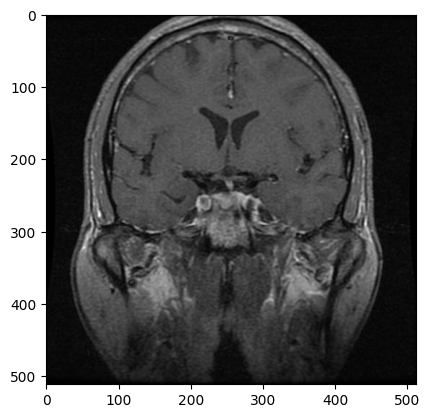

In [24]:
img = data_path + '/train/pituitary/'+ files_list_pituitary_train[rand_img_no]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

In [25]:
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [26]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [43]:
train_data = datasets.ImageFolder(os.path.join(data_path, 'train') , transform= train_transform)

AttributeError: module 'torch' has no attribute '_six'

In [44]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


2.3.0
0.14.1
